In [6]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from glob import glob

ONly Body, Quantify Spread in Data.

In [7]:
def freq_to_lambda(freq_Ghz): #Ghz
    c=299792458 # Speed of Light (m/s)
    lambda_m=c/(freq_Ghz*10**9)
    return lambda_m

In [8]:
def wipl_radiation_output_reader(path_to_file):
    ra1_df=pd.read_csv(path_to_file, sep=' ', skiprows=1, skipinitialspace=True,
                      names=['phi','theta','E_phi_real','E_phi_imag','E_theta_real','E_theta_imag', 'RCS','RCS_dB'])
          
    if len(path_to_file.split('/')[-1].split('_'))==8:
        ra1_dict={'BugType' : path_to_file.split('/')[-1].split('_')[0], 
                  'Specimen_Number' : path_to_file.split('/')[-1].split('_')[1],
                  'BodyType' : path_to_file.split('/')[-1].split('_')[2],
                  'WingPositioning' : path_to_file.split('/')[-1].split('_')[3],
                  'Resolution' : int(path_to_file.split('/')[-1].split('_')[4])/10,
                  'Scale' : int(path_to_file.split('/')[-1].split('_')[5])/10,
                  'Frequency' : int(path_to_file.split('/')[-1].split('_')[6])/10,
                  'InternalDomain' : path_to_file.split('/')[-1].split('_')[7].split('.')[0],
                  'WingDomain' : 'NA'
                  }
    elif len(path_to_file.split('/')[-1].split('_'))==9:
        ra1_dict={'BugType' : path_to_file.split('/')[-1].split('_')[0], 
                  'Specimen_Number' : path_to_file.split('/')[-1].split('_')[1],
                  'BodyType' : path_to_file.split('/')[-1].split('_')[2],
                  'WingPositioning' : path_to_file.split('/')[-1].split('_')[3],
                  'Resolution' : int(path_to_file.split('/')[-1].split('_')[4])/10,
                  'Scale' : int(path_to_file.split('/')[-1].split('_')[5])/10,
                  'Frequency' : int(path_to_file.split('/')[-1].split('_')[6])/10,
                  'InternalDomain' : path_to_file.split('/')[-1].split('_')[7],
                  'WingDomain' : path_to_file.split('/')[-1].split('_')[8].split('.')[0]
                  }
    
    
    return ra1_df, ra1_dict

In [16]:
#Data
dir='/Users/rrniii/Dropbox/BioDAR_EM_Modelling/Finished_Files/Moth_Full_Sep19/WIPL/Roman/Dielectric/0250_WaterMultiT/Only_Body/'
#T? 
f1=dir+'LepidopteraNoctuidaeMoth_12_OnlyBody_na_0250_1000_94_MirkWater.ra1'
f1_mass=396

#20C
f2=dir+'LepidopteraNoctuidaeMoth_12_OnlyBody_na_0250_1000_94_Water20C.ra1'
f2_mass=396

#35C
f3=dir+'LepidopteraNoctuidaeMoth_12_OnlyBody_na_0250_1000_94_Water35C.ra1'
f3_mass=396

#40C
f4=dir+'LepidopteraNoctuidaeMoth_12_OnlyBody_na_0250_1000_94_Water40C.ra1'
f4_mass=396


In [17]:
files=[f1,f2,f3,f4]


radiation_data=[]
radiation_metadata=[]
for f in files:
    print(f)
    print('go')
    file_name=f.split('/')[-1].split('.')[0]
    print(file_name)
    (ra1_df, ra1_dict)= wipl_radiation_output_reader(f)
    radiation_data.append(ra1_df)
    radiation_metadata.append(ra1_dict)

/Users/rrniii/Dropbox/BioDAR_EM_Modelling/Finished_Files/Moth_Full_Sep19/WIPL/Roman/Dielectric/0250_WaterMultiT/Only_Body/LepidopteraNoctuidaeMoth_12_OnlyBody_na_0250_1000_94_MirkWater.ra1
go
LepidopteraNoctuidaeMoth_12_OnlyBody_na_0250_1000_94_MirkWater
/Users/rrniii/Dropbox/BioDAR_EM_Modelling/Finished_Files/Moth_Full_Sep19/WIPL/Roman/Dielectric/0250_WaterMultiT/Only_Body/LepidopteraNoctuidaeMoth_12_OnlyBody_na_0250_1000_94_Water20C.ra1
go
LepidopteraNoctuidaeMoth_12_OnlyBody_na_0250_1000_94_Water20C
/Users/rrniii/Dropbox/BioDAR_EM_Modelling/Finished_Files/Moth_Full_Sep19/WIPL/Roman/Dielectric/0250_WaterMultiT/Only_Body/LepidopteraNoctuidaeMoth_12_OnlyBody_na_0250_1000_94_Water35C.ra1
go
LepidopteraNoctuidaeMoth_12_OnlyBody_na_0250_1000_94_Water35C
/Users/rrniii/Dropbox/BioDAR_EM_Modelling/Finished_Files/Moth_Full_Sep19/WIPL/Roman/Dielectric/0250_WaterMultiT/Only_Body/LepidopteraNoctuidaeMoth_12_OnlyBody_na_0250_1000_94_Water40C.ra1
go
LepidopteraNoctuidaeMoth_12_OnlyBody_na_0250_100

In [18]:
clpp_file="/Users/rrniii/Google_Drive/code/PycharmProjects/biodar/data/Drakeetal2017/tres_a_1320453_sm7338.xlsx"
sxx_syy_file="/Users/rrniii/Google_Drive/code/PycharmProjects/biodar/data/Drakeetal2017/tres_a_1320453_sm7373.xlsx"
clpp_raw_df = pd.read_excel(clpp_file, header=9, usecols="B:AA",skiprows=0,skipfooter=30, sheet_name='CLPP')
sxx_syy_raw_df = pd.read_excel(sxx_syy_file, header=9, usecols="B:O",skiprows=0,skipfooter=25, sheet_name='sxx,syy')
clpp_data_df=(clpp_raw_df[4:160]).reset_index(drop=True)
sxx_syy_data_df=(sxx_syy_raw_df[4:82]).reset_index(drop=True)
clpp_data_df_noctuid_moths_df=(clpp_data_df[clpp_data_df['Order - group within order'].str.contains("Lep - noctuid moth")]).reset_index(drop=True)
clpp_data_df_noctuid_moths_df.columns

Index(['Species', 'Species.1', 'Order - group within order', 'Species.2',
       'Species.3', 'Group', 'Source', 'Mass', 'Wing', 'Body', 'Body.1', 'sxx',
       'e (-ve)', 'b (e -ve)', 'e', 'b', 'q0', 'a0', 'a2', 'a4', 'a2.1',
       'a4.1', 'sxx/syy', 'a0.1', 'p', 'q'],
      dtype='object')

In [19]:
#Bernard Specs
Bernard_ForeWing_Length=19 #mm
Bernard_Body_Length=17.0 #mm
Bernard_Body_Width= 5.1 #mm
Bernard_Body_Height= 4.75 #mm

#E&M Properties
BBG_perm=34.3-18.6j  # Permittvity; Mirkovic et al. 2018 based on Nelson et al. 1998
BBG_dens=1.26  #g/cm^3density; Mirkovic et al. 2018 based on Nelson et al. 1998

#Bernard Mass Estimates
Full_Bernard_Volume_BBG_mass=380
Body_Only_Bernard_Volume_BBG_mass=380

/Users/rrniii/anaconda3/envs/biodar/lib/python3.7/site-packages/ipykernel_launcher.py:22: FutureWarning: Series.data is deprecated and will be removed in a future version
/Users/rrniii/anaconda3/envs/biodar/lib/python3.7/site-packages/ipykernel_launcher.py:36: FutureWarning: Series.data is deprecated and will be removed in a future version
/Users/rrniii/anaconda3/envs/biodar/lib/python3.7/site-packages/ipykernel_launcher.py:42: FutureWarning: Series.data is deprecated and will be removed in a future version
/Users/rrniii/anaconda3/envs/biodar/lib/python3.7/site-packages/ipykernel_launcher.py:57: FutureWarning: Series.data is deprecated and will be removed in a future version
/Users/rrniii/anaconda3/envs/biodar/lib/python3.7/site-packages/ipykernel_launcher.py:63: FutureWarning: Series.data is deprecated and will be removed in a future version
/Users/rrniii/anaconda3/envs/biodar/lib/python3.7/site-packages/ipykernel_launcher.py:78: FutureWarning: Series.data is deprecated and will be re

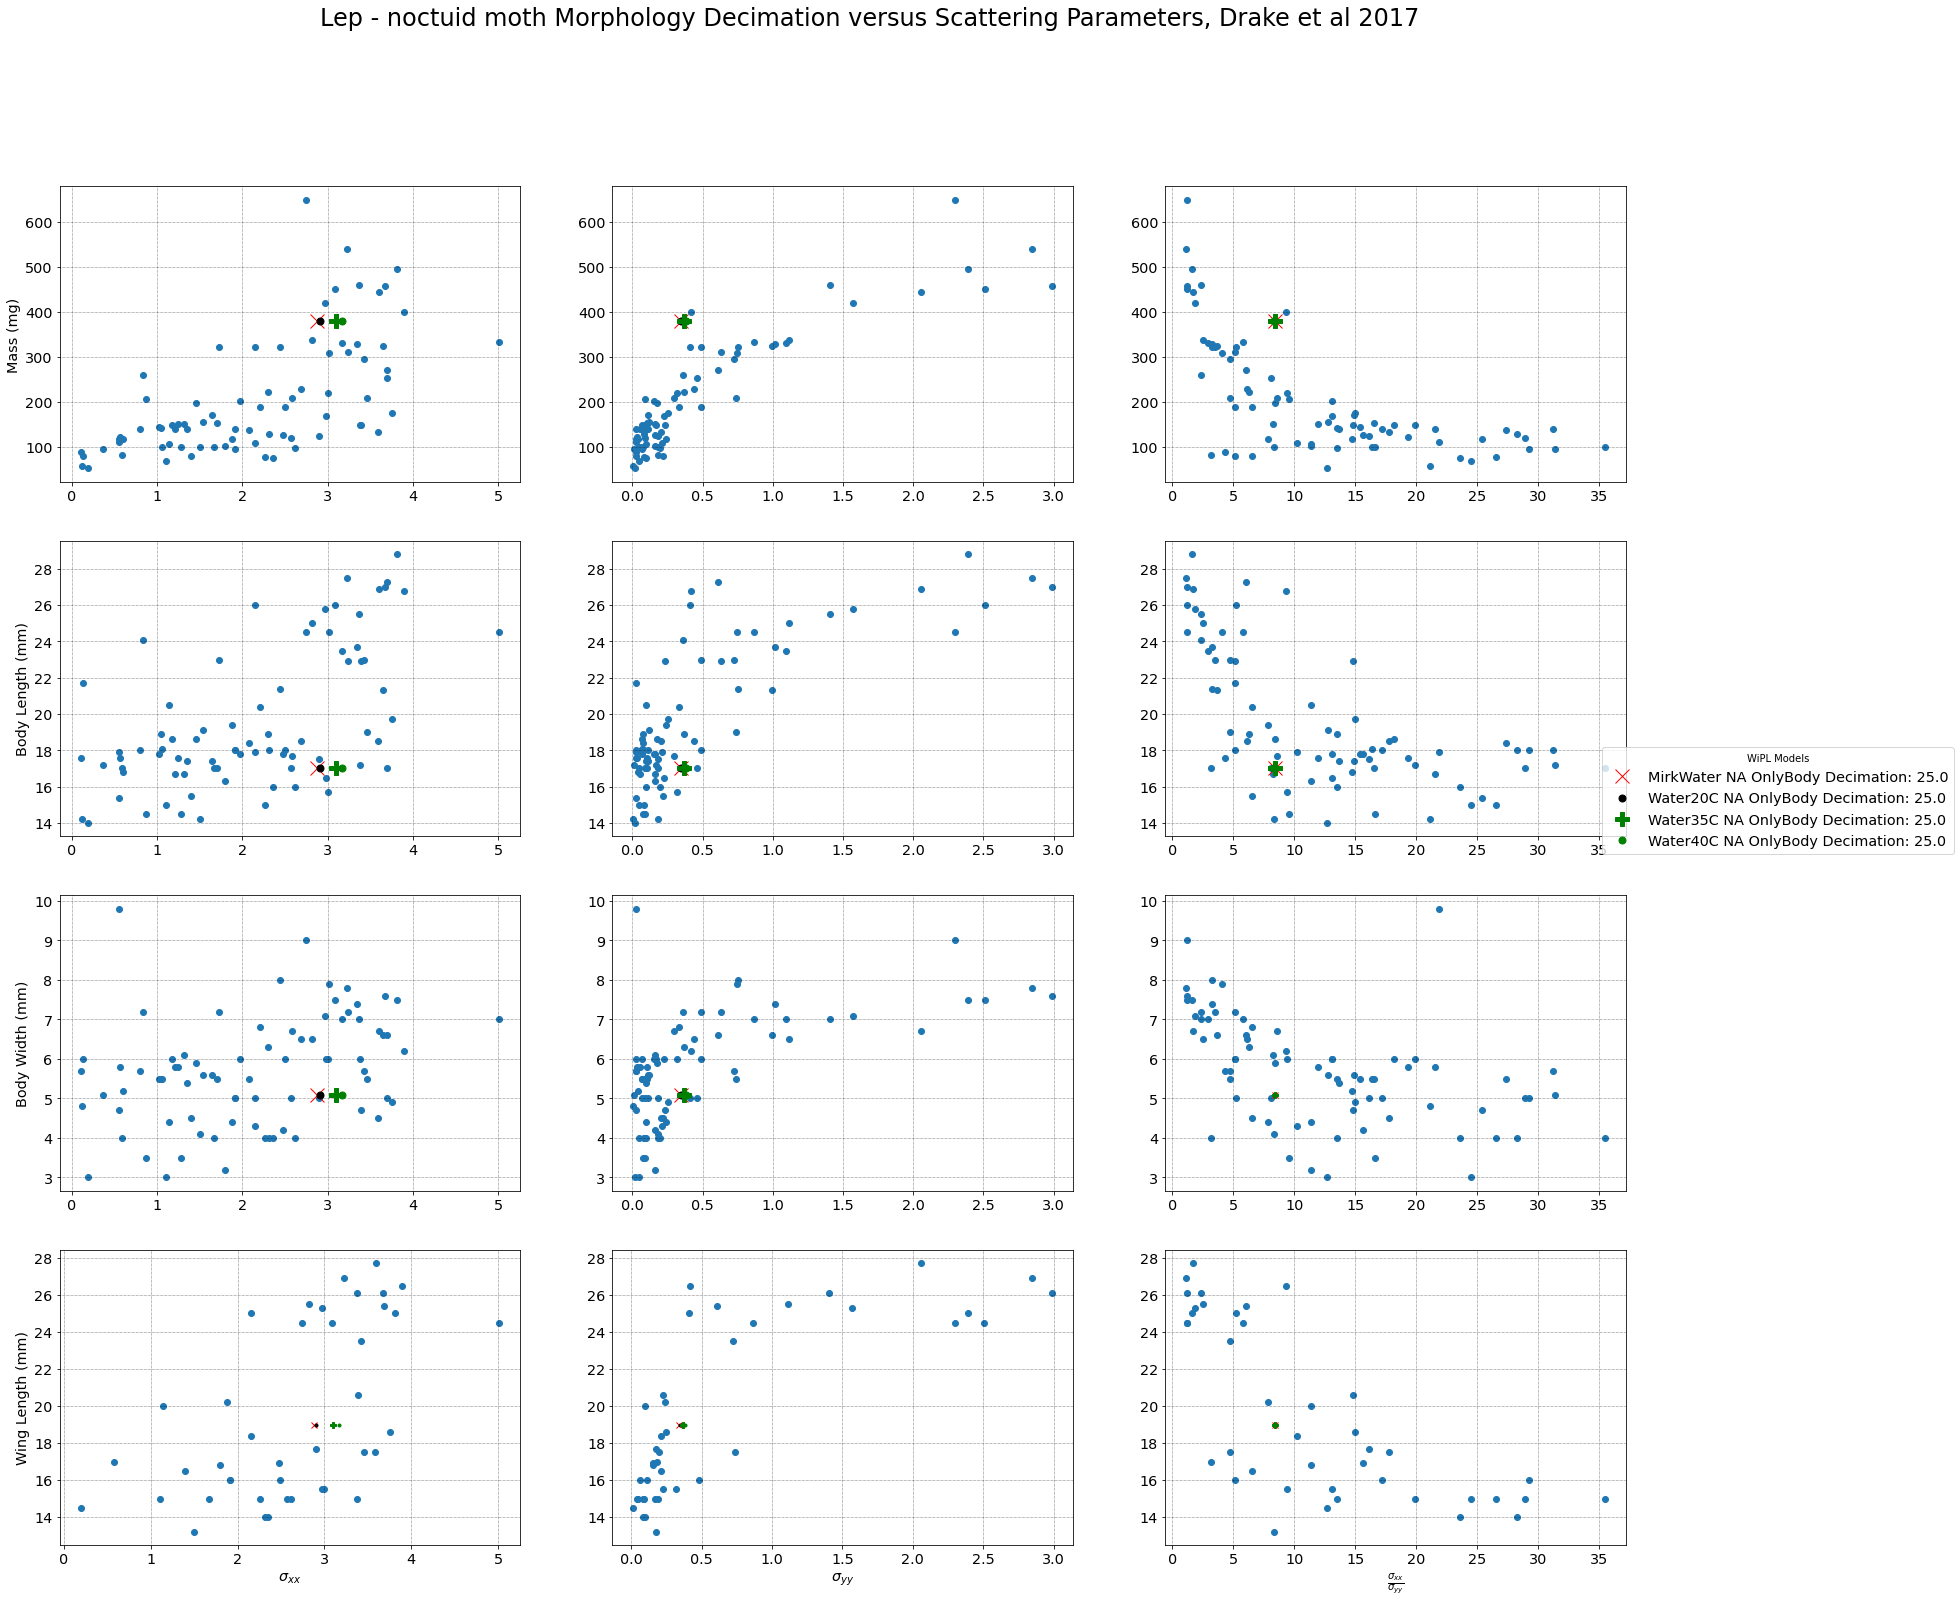

In [20]:
wipl_colours_marks=['rx','k.','gP','g.','y+','rx','kP','g3','c|','yx','m_','m|','m3','yx','y|','y+','y_','y1','y3','ys',]
ellipsoid_wipl_colours_marks=['ok','gP','bD','.k','g+','bd']
ellipsoid_Names=['Original','Drake','New Measurements', 'Original Water','Drake Water','New Measurements Water']
ellipsoid_Mass=[Body_Only_Bernard_Volume_BBG_mass,133,Body_Only_Bernard_Volume_BBG_mass,Body_Only_Bernard_Volume_BBG_mass,133,Body_Only_Bernard_Volume_BBG_mass]
ellipsoid_Body_Length=[18.8,18.5,Bernard_Body_Length,18.8,18.5,Bernard_Body_Length]
ellipsoid_Body_Width=[5.72,4.5,Bernard_Body_Width,5.72,4.5,Bernard_Body_Width]
ellipsoid_ForeWing_Length=[Bernard_ForeWing_Length,17.5,Bernard_ForeWing_Length,Bernard_ForeWing_Length,17.5,Bernard_ForeWing_Length]
scaling_marks=['v','^','>','<','D','*','p','P', '8','d']

fig, axs = plt.subplots(4, 3, figsize=[30,25], facecolor='white')
params = {'legend.fontsize': 'x-large',
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)
plt.suptitle("Lep - noctuid moth Morphology Decimation versus Scattering Parameters, Drake et al 2017", fontsize=24)

axs[0,0].scatter(clpp_data_df_noctuid_moths_df['sxx'],clpp_data_df_noctuid_moths_df['Mass'],label='_nolegend_')
for idx, val in enumerate(radiation_data):
    r=radiation_data[idx]['RCS'].loc[radiation_data[idx]['theta'] == -90.0]*(freq_to_lambda(9.4)*100)**2
    axs[0,0].plot(np.max(r.data),Full_Bernard_Volume_BBG_mass,wipl_colours_marks[idx],markersize=14,label=str(radiation_metadata[idx]['InternalDomain'])+' '+str(radiation_metadata[idx]['WingDomain'])+' '+str(radiation_metadata[idx]['BodyType'])+' Decimation: '+str(radiation_metadata[idx]['Resolution']))

axs[0,0].set(xlabel='', ylabel='Mass (mg)')


axs[0,1].scatter(clpp_data_df_noctuid_moths_df['sxx']*1/clpp_data_df_noctuid_moths_df['sxx/syy'],clpp_data_df_noctuid_moths_df['Mass'],label='_nolegend_')
for idx, val in enumerate(radiation_data):
    r=radiation_data[idx]['RCS'].loc[radiation_data[idx]['theta'] == -90.0]*(freq_to_lambda(9.4)*100)**2
    axs[0,1].plot(min(r),Full_Bernard_Volume_BBG_mass,wipl_colours_marks[idx],markersize=14,label='_nolegend_')
    

axs[0,2].scatter(clpp_data_df_noctuid_moths_df['sxx/syy'], clpp_data_df_noctuid_moths_df['Mass'],label='_nolegend_')
for idx, val in enumerate(radiation_data):
    r=radiation_data[idx]['RCS'].loc[radiation_data[idx]['theta'] == -90.0]*(freq_to_lambda(9.4)*100)**2
    axs[0,2].plot(np.max(r.data)/min(r),Full_Bernard_Volume_BBG_mass,wipl_colours_marks[idx],markersize=14,label='_nolegend_')

    
axs[1,0].scatter(clpp_data_df_noctuid_moths_df['sxx'],clpp_data_df_noctuid_moths_df['Body'],label='_nolegend_')
for idx, val in enumerate(radiation_data):
    r=radiation_data[idx]['RCS'].loc[radiation_data[idx]['theta'] == -90.0]*(freq_to_lambda(9.4)*100)**2
    axs[1,0].plot(np.max(r.data),Bernard_Body_Length,wipl_colours_marks[idx],markersize=14,label='_nolegend_')
    
axs[1,0].set(xlabel='', ylabel='Body Length (mm)')



axs[1,1].scatter(clpp_data_df_noctuid_moths_df['sxx']*1/clpp_data_df_noctuid_moths_df['sxx/syy'],clpp_data_df_noctuid_moths_df['Body'],label='_nolegend_')
for idx, val in enumerate(radiation_data):
    r=radiation_data[idx]['RCS'].loc[radiation_data[idx]['theta'] == -90.0]*(freq_to_lambda(9.4)*100)**2
    axs[1,1].plot(min(r),Bernard_Body_Length,wipl_colours_marks[idx],markersize=14,label='_nolegend_')
    

axs[1,2].scatter(clpp_data_df_noctuid_moths_df['sxx/syy'], clpp_data_df_noctuid_moths_df['Body'],label='_nolegend_')
for idx, val in enumerate(radiation_data):
    r=radiation_data[idx]['RCS'].loc[radiation_data[idx]['theta'] == -90.0]*(freq_to_lambda(9.4)*100)**2
    axs[1,2].plot(np.max(r.data)/min(r),Bernard_Body_Length,wipl_colours_marks[idx],markersize=14,label='_nolegend_')
    
    
axs[2,0].scatter(clpp_data_df_noctuid_moths_df['sxx'],clpp_data_df_noctuid_moths_df['Body.1'],label='_nolegend_')
for idx, val in enumerate(radiation_data):
    r=radiation_data[idx]['RCS'].loc[radiation_data[idx]['theta'] == -90.0]*(freq_to_lambda(9.4)*100)**2
    axs[2,0].plot(np.max(r.data),Bernard_Body_Width,wipl_colours_marks[idx],markersize=14,label='_nolegend_')

axs[2,0].set(xlabel='', ylabel='Body Width (mm)')



axs[2,1].scatter(clpp_data_df_noctuid_moths_df['sxx']*1/clpp_data_df_noctuid_moths_df['sxx/syy'],clpp_data_df_noctuid_moths_df['Body.1'],label='_nolegend_')
for idx, val in enumerate(radiation_data):
    r=radiation_data[idx]['RCS'].loc[radiation_data[idx]['theta'] == -90.0]*(freq_to_lambda(9.4)*100)**2
    axs[2,1].plot(min(r),Bernard_Body_Width,wipl_colours_marks[idx],markersize=14,label='_nolegend_')


axs[2,2].scatter(clpp_data_df_noctuid_moths_df['sxx/syy'], clpp_data_df_noctuid_moths_df['Body.1'],label='_nolegend_')
for idx, val in enumerate(radiation_data):
    r=radiation_data[idx]['RCS'].loc[radiation_data[idx]['theta'] == -90.0]*(freq_to_lambda(9.4)*100)**2
    axs[2,2].plot(np.max(r.data)/min(r),Bernard_Body_Width,wipl_colours_marks[idx],label='_nolegend_')


axs[3,0].scatter(clpp_data_df_noctuid_moths_df['sxx'],clpp_data_df_noctuid_moths_df['Wing'],label='_nolegend_')
for idx, val in enumerate(radiation_data):
    r=radiation_data[idx]['RCS'].loc[radiation_data[idx]['theta'] == -90.0]*(freq_to_lambda(9.4)*100)**2
    axs[3,0].plot(np.max(r.data),Bernard_ForeWing_Length,wipl_colours_marks[idx],label='_nolegend_')

axs[3,0].set(xlabel=r'$\sigma_{xx}$', ylabel='Wing Length (mm)')


axs[3,1].scatter(clpp_data_df_noctuid_moths_df['sxx']*1/clpp_data_df_noctuid_moths_df['sxx/syy'],clpp_data_df_noctuid_moths_df['Wing'],label='_nolegend_')
for idx, val in enumerate(radiation_data):
    r=radiation_data[idx]['RCS'].loc[radiation_data[idx]['theta'] == -90.0]*(freq_to_lambda(9.4)*100)**2
    axs[3,1].plot(min(r),Bernard_ForeWing_Length,wipl_colours_marks[idx],label='_nolegend_')

axs[3,1].set(xlabel=r'$\sigma_{yy}$')


axs[3,2].scatter(clpp_data_df_noctuid_moths_df['sxx/syy'], clpp_data_df_noctuid_moths_df['Wing'],label='_nolegend_')
for idx, val in enumerate(radiation_data):
    r=radiation_data[idx]['RCS'].loc[radiation_data[idx]['theta'] == -90.0]*(freq_to_lambda(9.4)*100)**2
    axs[3,2].plot(np.max(r.data)/min(r),Bernard_ForeWing_Length,wipl_colours_marks[idx],label='_nolegend_')

axs[3,2].set(xlabel=r'$\frac{\sigma_{xx}}{\sigma_{yy}}$')


l=fig.legend(    # The line objects
           loc="center right",   # Position of legend
           borderaxespad=0.1,    # Small spacing around legend box
           title="WiPL Models"  # Title for the legend
           )
    
for ax in fig.get_axes():
    ax.grid(which='major', linestyle=':', linewidth='0.5', color='black')

plt.subplots_adjust(right=0.85)
#plt.tight_layout(rect=[0, 0.03, 1, 0.95])
fig.show()